# Final Submission


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data


## Data Import


In [32]:
df_csv = pd.read_csv("data/fma-rock-vs-hiphop.csv")
df_json = pd.read_json("data/echonest-metrics.json", precise_float=True)
df_additional = pd.read_csv("data/tcc_ceds_music.csv")

In [33]:
df_additional = df_additional[
    (df_additional["genre"] == "rock") | (df_additional["genre"] == "hip hop")
]

df_additional["genre"] = df_additional["genre"].replace(
    {"rock": "Rock", "hip hop": "Hip-Hop"}
)

In [34]:
df_additional["track_id"] = df_additional.index
df_additional.shape

(4938, 32)

In [35]:
df_additional.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,track_id
23434,70345,ronnie self,big fool,1955,Rock,fool fool tell love walk fool fool drivin craz...,54,0.059256,0.000993,0.000993,...,0.000993,0.666414,0.756865,0.764056,0.000007,0.956719,0.720712,sadness,0.928571,23434
23435,70347,ronnie self,bop-a-lena,1955,Rock,gogalgo bopalena bopalena bopalena bopalena ye...,60,0.001949,0.001949,0.001949,...,0.001949,0.587350,0.852934,0.604417,0.006346,0.968054,0.941940,obscene,0.928571,23435
23436,70351,frankie laine,i heard the angels singing,1956,Rock,hear angels sing come sing come sing come hear...,123,0.301732,0.000532,0.000532,...,0.000532,0.650168,0.648078,0.758032,0.000000,0.930956,0.508493,music,0.914286,23436
23437,70352,frankie laine,i feel like my time ain't long,1956,Rock,bridge look idols think niggas gods right hand...,199,0.000516,0.073149,0.049564,...,0.000516,0.596014,0.632413,0.759036,0.000000,0.739283,0.460444,obscene,0.914286,23437
23438,70354,bill haley & his comets,jamaica d.j.,1956,Rock,montego work work bother like kind work call s...,65,0.001032,0.001032,0.001032,...,0.001032,0.745478,0.690280,0.712851,0.000004,0.863974,0.833829,music,0.914286,23438


## Data Combination


In [36]:
column_mapping = {
    "track_name": "title",
    "artist_name": "composer",
    "genre": "genre_top",
}

df_additional = df_additional.rename(columns=column_mapping)

In [37]:
df_merge = pd.merge(df_csv, df_json, on="track_id")

df_combined = pd.concat([df_merge, df_additional])

In [38]:
df_combined.shape
new_music_data = df_combined

## Column Removal


In [39]:
missing_percentage = (new_music_data.isna().sum() / len(new_music_data)) * 100

missing_percentage = missing_percentage.round(0)

print(missing_percentage)

track_id                      0.0
bit_rate                     51.0
comments                     51.0
composer                     48.0
date_created                 51.0
date_recorded                87.0
duration                     51.0
favorites                    51.0
genre_top                     0.0
genres                       51.0
genres_all                   51.0
information                  97.0
interest                     51.0
language_code                73.0
license                      51.0
listens                      51.0
lyricist                    100.0
number                       51.0
publisher                   100.0
tags                         51.0
title                         0.0
acousticness                  0.0
danceability                  0.0
energy                        0.0
instrumentalness              0.0
liveness                     51.0
speechiness                  51.0
tempo                        51.0
valence                       0.0
Unnamed: 0    

In [40]:
threshold = 49

columns_to_remove = missing_percentage[missing_percentage >= threshold].index

new_music_data = new_music_data.drop(columns_to_remove, axis=1)

In [41]:
new_music_data.shape

(9740, 9)

In [42]:
new_music_data_clean = new_music_data.drop(columns=["track_id", "title", "composer"])
new_music_data_clean.info

<bound method DataFrame.info of       genre_top  acousticness  danceability    energy  instrumentalness  \
0          Rock      0.988306      0.255661  0.979774          0.973006   
1          Rock      0.970135      0.352946  0.023852          0.957113   
2          Rock      0.981657      0.142249  0.912122          0.967294   
3          Rock      0.989141      0.225978  0.722835          0.263076   
4          Rock      0.886660      0.298518  0.744333          0.920950   
...         ...           ...           ...       ...               ...   
28367   Hip-Hop      0.062549      0.889527  0.695686          0.000000   
28368   Hip-Hop      0.004607      0.662082  0.797791          0.000002   
28369   Hip-Hop      0.104417      0.663165  0.767761          0.000001   
28370   Hip-Hop      0.007027      0.883028  0.885882          0.000503   
28371   Hip-Hop      0.015862      0.828875  0.492477          0.000000   

        valence  
0      0.034018  
1      0.035632  
2      0.0343

In [43]:
new_music_data_clean

,genre_top,acousticness,danceability,energy,instrumentalness,valence
0,Rock,0.988306,0.255661,0.979774,0.973006,0.034018
1,Rock,0.970135,0.352946,0.023852,0.957113,0.035632
2,Rock,0.981657,0.142249,0.912122,0.967294,0.034325
3,Rock,0.989141,0.225978,0.722835,0.263076,0.028347
4,Rock,0.886660,0.298518,0.744333,0.920950,0.073548
...,...,...,...,...,...,...
28367,Hip-Hop,0.062549,0.889527,0.695686,0.000000,0.751649
28368,Hip-Hop,0.004607,0.662082,0.797791,0.000002,0.922712
28369,Hip-Hop,0.104417,0.663165,0.767761,0.000001,0.838211
28370,Hip-Hop,0.007027,0.883028,0.885882,0.000503,0.508450


In [44]:
# show all rock
new_music_data_clean[new_music_data_clean["genre_top"] == "Rock"]

,genre_top,acousticness,danceability,energy,instrumentalness,valence
0,Rock,0.988306,0.255661,0.979774,0.973006,0.034018
1,Rock,0.970135,0.352946,0.023852,0.957113,0.035632
2,Rock,0.981657,0.142249,0.912122,0.967294,0.034325
3,Rock,0.989141,0.225978,0.722835,0.263076,0.028347
4,Rock,0.886660,0.298518,0.744333,0.920950,0.073548
...,...,...,...,...,...,...
27463,Rock,0.035943,0.508285,0.912910,0.008796,0.722795
27464,Rock,0.000485,0.432470,0.766759,0.000057,0.386851
27465,Rock,0.071585,0.507202,0.731723,0.000003,0.372424
27466,Rock,0.336345,0.701072,0.462446,0.000015,0.486810


In [45]:
new_music_data_clean[new_music_data_clean["genre_top"] == "Hip-Hop"]

,genre_top,acousticness,danceability,energy,instrumentalness,valence
3892,Hip-Hop,0.416675,0.675894,0.634476,0.010628,0.576661
3893,Hip-Hop,0.374408,0.528643,0.817461,0.001851,0.269240
3894,Hip-Hop,0.043567,0.745566,0.701470,0.000697,0.621661
3895,Hip-Hop,0.452217,0.513238,0.560410,0.019443,0.894072
3896,Hip-Hop,0.748986,0.765886,0.513173,0.957209,0.401672
...,...,...,...,...,...,...
28367,Hip-Hop,0.062549,0.889527,0.695686,0.000000,0.751649
28368,Hip-Hop,0.004607,0.662082,0.797791,0.000002,0.922712
28369,Hip-Hop,0.104417,0.663165,0.767761,0.000001,0.838211
28370,Hip-Hop,0.007027,0.883028,0.885882,0.000503,0.508450


## Split


In [46]:
# Define our features (assuming your DataFrame is named new_music_data_clean and the labels column is 'genre_top')
features = new_music_data_clean.drop(["genre_top"], axis=1)

# Define our labels (assuming your DataFrame is named new_music_data_clean and the labels column is 'genre_top')
labels = new_music_data_clean["genre_top"]

# Import the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    features,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels,
)

In [47]:
# get train percentage
type(train_labels)
train_labels.nunique()
train_labels.value_counts()

genre_top
Rock       6341
Hip-Hop    1451
Name: count, dtype: int64

## Smote


In [48]:
# smote
from imblearn.over_sampling import SMOTE

# Define SMOTE
sm = SMOTE(random_state=42)

# Fit SMOTE on training data
train_features_res, train_labels_res = sm.fit_resample(train_features, train_labels)

## Scaling


In [49]:
# Scale the features and store the values in a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(train_features)
scaled_train_features_res = scaler.fit_transform(train_features_res)
scaled_test_features = scaler.transform(test_features)

## PCA


## KNN


In [50]:
print(train_features.shape)
print(scaled_train_features_res.shape)
print(scaled_train_features.shape)

(7792, 5)
(12682, 5)
(7792, 5)


### Pipeline


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Assuming you have your training data in 'train_features' and 'train_labels'
# and your test data in 'test_features' and 'test_labels'

# Define the model as the K-Nearest Neighbors classifier and fit the model to the data.
knn = KNeighborsClassifier()

# Define the pipeline steps. The data will first be scaled and then passed to the kNN classifier.
steps = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
pipeline = Pipeline(steps)

# Define the hyperparameter configuration space.
parameters = {
    "knn__n_neighbors": np.arange(1, 25),
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan", "minkowski"],
}

# Create the GridSearchCV object with 5-fold cross-validation.
best_model_knn = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit the model to the training set. Make sure the training features are not pre-scaled.
best_model_knn.fit(train_features, train_labels)

# Predict the labels of the test set: y_pred
y_pred = best_model_knn.predict(test_features)

### Metrics


In [52]:
# Compute and print metrics
from sklearn.metrics import classification_report


print("Accuracy: {}".format(best_model_knn.score(scaled_test_features, test_labels)))
print(classification_report(test_labels, y_pred))
print("Tuned Model Parameters: {}".format(best_model_knn.best_params_))


# # Evaluate the model
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Assuming you have the actual labels for the test set in 'test_labels'
# print("Accuracy:", accuracy_score(test_labels, y_pred))
# print("Classification Report:\n", classification_report(test_labels, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(test_labels, y_pred))
# print("Tuned Model Parameters: {}".format(best_model_knn.best_params_))

Accuracy: 0.86652977412731
              precision    recall  f1-score   support

     Hip-Hop       0.72      0.50      0.59       363
        Rock       0.89      0.96      0.92      1585

    accuracy                           0.87      1948
   macro avg       0.81      0.73      0.76      1948
weighted avg       0.86      0.87      0.86      1948

Tuned Model Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 19, 'knn__weights': 'distance'}


/Users/gajokremer/Documents/Career/Semester_VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[ 181  182]
 [  71 1514]]


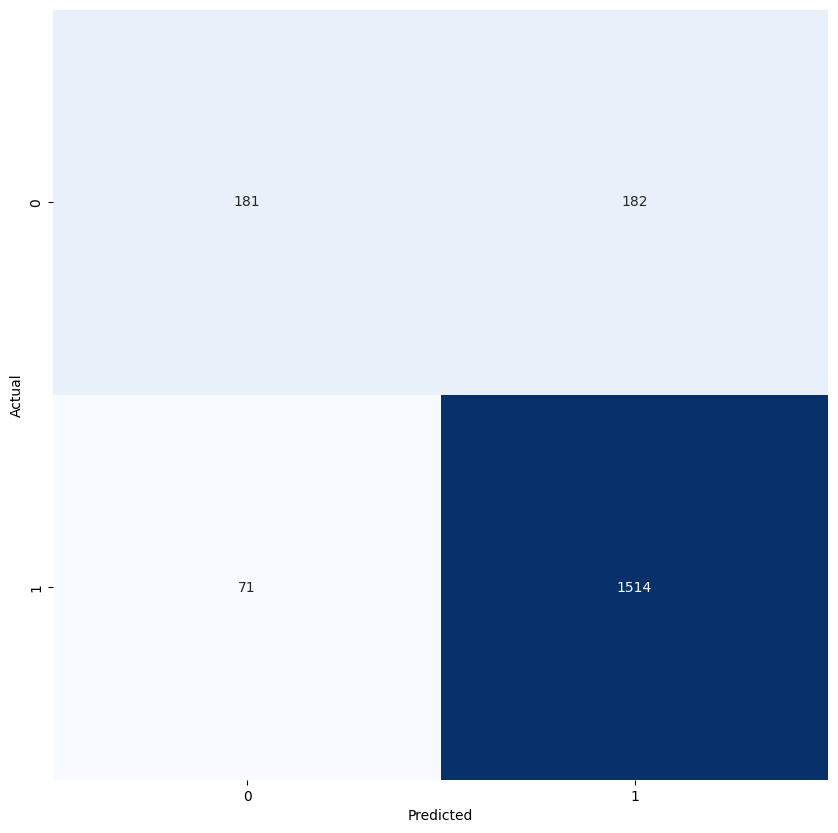

In [53]:
from sklearn.metrics import confusion_matrix


print(confusion_matrix(test_labels, y_pred))

# print the confusion matrix using seaborn

cm = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [54]:
best_model_knn.predict_proba(scaled_train_features_res) * 100

/Users/gajokremer/Documents/Career/Semester_VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[  0.        , 100.        ],
       [  0.        , 100.        ],
       [ 68.22204873,  31.77795127],
       ...,
       [  0.        , 100.        ],
       [  0.        , 100.        ],
       [ 20.34809669,  79.65190331]])

/Users/gajokremer/Documents/Career/Semester_VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


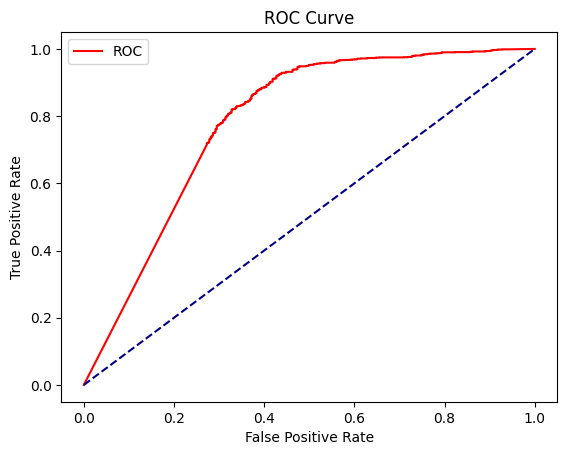

In [55]:
# roc curve for rock and hip hop
from sklearn.metrics import roc_curve

y_pred_prob = best_model_knn.predict_proba(scaled_test_features)[:, 1]

fpr, tpr, thresholds = roc_curve(test_labels, y_pred_prob, pos_label="Hip-Hop")

plt.plot(tpr, fpr, color="red", label="ROC")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [56]:
# Esta función maximiza el TPR y minimiza el FPR
def umbral_optimo(y_prob, y, ths):
    y_prob_c1 = y_prob[:, 1]
    roc = []
    for j in range(len(ths)):
        y_pred = np.zeros(len(y_prob_c1))
        for i in range(len(y_prob_c1)):
            if y_prob_c1[i] >= ths[j]:
                y_pred[i] = 1
        cm = confusion_matrix(y, y_pred)
        TP = cm[1, 1]
        TN = cm[0, 0]
        FP = cm[0, 1]
        FN = cm[1, 0]
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        roc.append((TPR, FPR, ths[j]))

    roc = np.array(roc)

    distance_to_top_left_corner = []

    for i in range(len(roc)):
        distance_to_top_left_corner.append(
            np.sqrt(((roc[i, 1] - 0) ** 2) + ((roc[i, 0] - 1) ** 2))
        )

    index_of_best_threshold = distance_to_top_left_corner.index(
        min(distance_to_top_left_corner)
    )  # Retorna el índice con la menor distancia
    best_threshold = ths[index_of_best_threshold]
    # print('El mejor umbral para el conjunto de validación es {:.4f}.'.format(best_threshold))
    return best_threshold

In [57]:
binary_train_labels_res = train_labels_res.replace({"Hip-Hop": 0, "Rock": 1})

y_pred_train_proba_res = best_model_knn.predict_proba(scaled_train_features_res)

best_th = umbral_optimo(y_pred_train_proba_res, binary_train_labels_res, thresholds)
print("El mejor umbral es {:.4f}.".format(best_th))

/Users/gajokremer/Documents/Career/Semester_VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


El mejor umbral es 0.9477.
